### Definition of popular

- share count
- like count
- comment count
- the rate of all 3 above with respect to play count

### Hypothesis: Length of videos (coupled with music and content) explains popularity of TikTok

Given people's short attention span, TikTok's built-in video recording feature is capped at 15s to encourage users to be more creative in grabbing attention through content
(i.e. catchy music, duet, challenges etc.)

There are methods to upload > 15s and > 60s but with the following video limitations:
- File Size: Videos can be up to 287 MB for iOS devices and 72 MB for Android. Ads can be up to 500 MB.
- Orientation: TikTok is designed for showcasing vertical video, but you can change it to horizontal if you want.
- Dimensions: TikTok can handle up to standard HD dimensions (1080 x 1920)
- Aspect Ratio: TikTok videos are normally formatted in standard smartphone aspect ratio (9:16). You can also make 1:1 videos but these are less common and won’t fir the entire screen.
- File type: User can upload .mp4 and .mov file types. Ads support .avi and .gif files

## Import Packages

In [2]:
import json
import numpy as np
import pandas as pd
from clean import CleanData
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

## Read Data

In [3]:
data = json.load(open('./data/trending.json', encoding="utf8"))
data = data['collector']
toParse = pd.json_normalize(data)
df = CleanData(toParse)
df.process_the_data()
df.summary_of_data()

Missing Data:
None

Data Time Period:
Start Date: 2020-09-22 14:22:38
  End Date: 2020-12-21 03:18:36
 Timedelta: 89 days 12:55:58


## Segementation

In [4]:
df_clean = df.dfm
# df_clean.sort_values(by=['likeCount'],ascending=False).head(1).T

In [5]:
segmentDf = df_clean[['authorMeta.name','authorMeta.verified','shareRate','likeRate','commentRate','playCount','shareCount','likeCount','commentCount']]
segmentDf = segmentDf.groupby(['authorMeta.name','authorMeta.verified'],as_index=False).agg(np.mean)
segmentDf = segmentDf.sort_values(by='likeRate',ascending=False)#.head(3).T
segmentDf.head(3).T

,57,399,595
authorMeta.name,anwarali0125,l3fty_fr3ak,reus.fx
authorMeta.verified,False,False,False
shareRate,0.003181,0.020488,0.017623
likeRate,0.485684,0.446655,0.375128
commentRate,0.008484,0.011573,0.007987
playCount,943.0,55300.0,232950.0
shareCount,3.0,1133.0,4390.0
likeCount,458.0,24700.0,87850.0
commentCount,8.0,640.0,1832.0


In [6]:
segmentDf['authorMeta.verified'].unique()

array([False,  True])

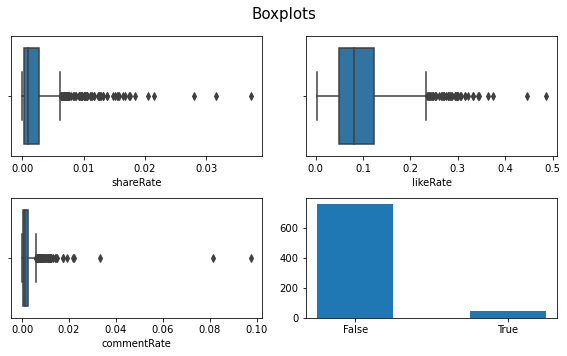

In [7]:
fig = plt.figure(figsize=(8, 5), tight_layout=True)
plt.suptitle('Boxplots', fontsize=15)
fig.add_subplot(221)
sns.boxplot(x='shareRate', data=segmentDf)
fig.add_subplot(222)
sns.boxplot(x='likeRate', data=segmentDf)
fig.add_subplot(223)
sns.boxplot(x='commentRate', data=segmentDf)
ax = fig.add_subplot(224)

categories = segmentDf['authorMeta.verified'].unique()
counts = segmentDf['authorMeta.verified'].value_counts()
pos = [0,1]
ax.bar(pos,counts,width=0.5)

ax.set_xticks(pos)
ax.set_xticklabels(categories)

plt.show()

## EDA

### Old - Plot distribution of video creation between data time period

In [8]:
df_clean[['createTime']].groupby(df_clean["createTime"].dt.month).count().transpose()

createTime,9,10,11,12
createTime,80,325,311,284


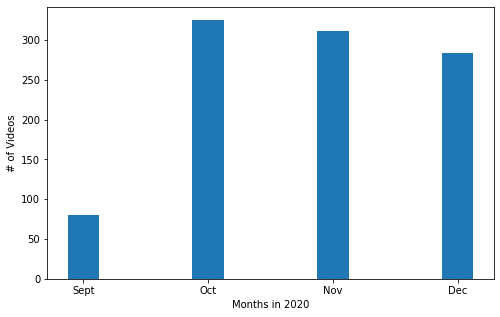

In [9]:
pivot_df = df_clean[['createTime']].groupby(df_clean["createTime"].dt.month).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
pivot_df = pivot_df.rename(columns={"createTime": "count"})
pivot_df = pivot_df.reset_index()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
x = pivot_df['createTime']
y = pivot_df['count']

ax.bar(x,y,width=0.25)
ax.set_xticks(np.arange(min(x), max(x)+1, 1))
ax.set_xticklabels(['Sept','Oct','Nov','Dec'])
ax.set_xlabel('Months in 2020')
ax.set_ylabel('# of Videos')
plt.show()

### Old - Plot distribution of video lengths

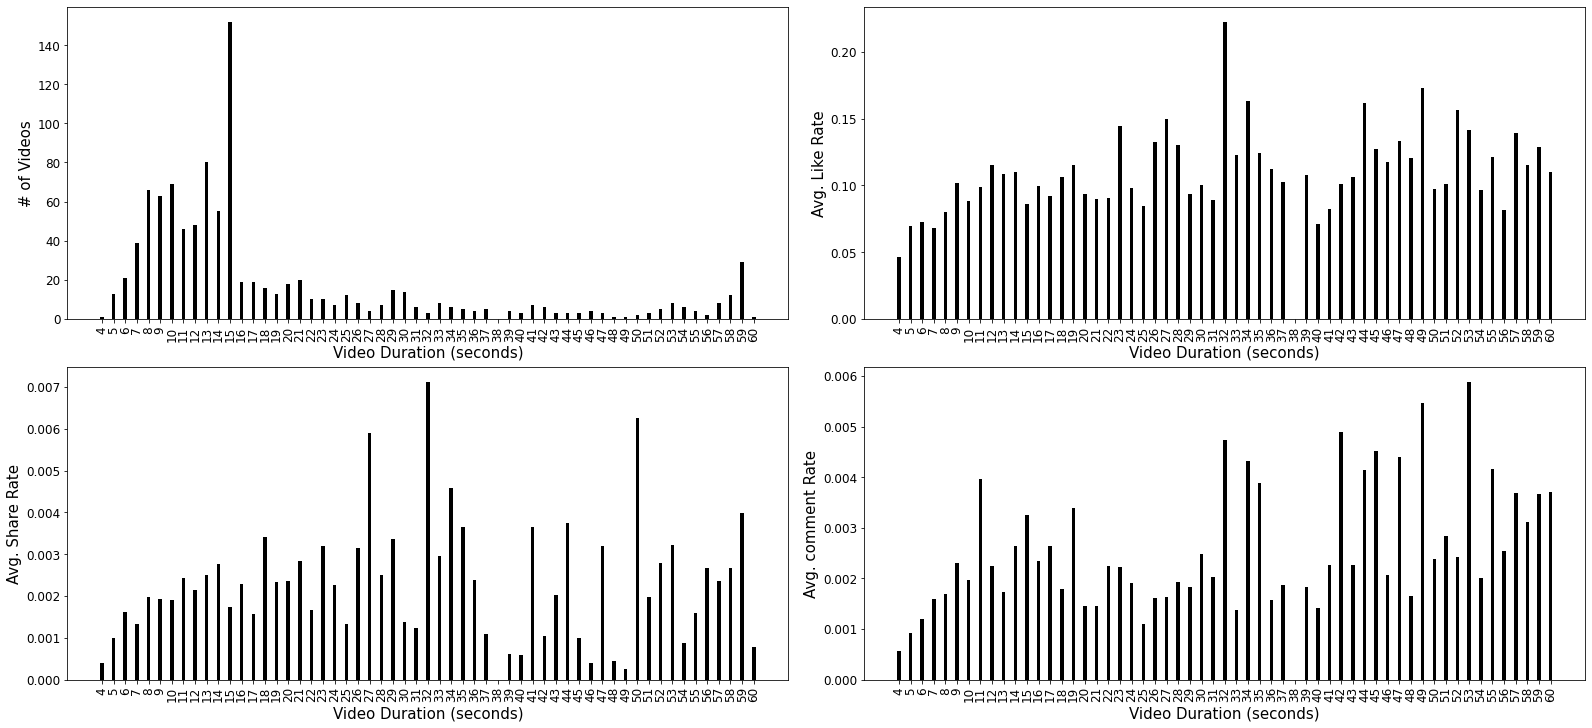

In [10]:
count_df = df_clean[['videoMeta.duration']].groupby(df_clean["videoMeta.duration"]).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
count_df = count_df.rename(columns={"videoMeta.duration": "count"})
count_df = count_df.reset_index()

avg_df = df_clean[['videoMeta.duration','likeRate','shareRate','commentRate']]
avg_df = avg_df.groupby(['videoMeta.duration'],as_index=False).agg([np.mean]).reset_index()
avg_df.columns = avg_df.columns.droplevel(-1)
# avg_df.sort_values(by='likeCount',ascending=False).head(3).T
# avg_df.head()

fig = plt.figure(figsize=(22,10),constrained_layout=True)
bar_width = 0.3

ax1 = fig.add_subplot(221)
x = count_df['videoMeta.duration']
y = count_df['count']

ax1.bar(x,y, color='k', width=bar_width)
ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax1.set_ylabel('# of Videos', fontdict={'fontsize': 15})
ax1.tick_params(axis='both', which='major', labelsize=12)

# ax1.bar([15], count_df[count_df['videoMeta.duration'] == 15]['count'].iloc[0], color='r', width=bar_width)

ax2 = fig.add_subplot(222)
x = avg_df['videoMeta.duration']
y = avg_df['likeRate']

ax2.bar(x,y,color='k', width=bar_width)
ax2.set_xticks(np.arange(min(x), max(x)+1, 1))
ax2.set_xticklabels(ax2.get_xticks(),rotation=90)
ax2.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax2.set_ylabel('Avg. Like Rate', fontdict={'fontsize': 15})
ax2.tick_params(axis='both', which='major', labelsize=12)

# target = [9,40]
# ax2.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['likeRate'], color='r', width=bar_width)

ax3 = fig.add_subplot(223)
x = avg_df['videoMeta.duration']
y = avg_df['shareRate']

ax3.bar(x,y,color='k', width=bar_width)
ax3.set_xticks(np.arange(min(x), max(x)+1, 1))
ax3.set_xticklabels(ax3.get_xticks(),rotation=90)
ax3.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax3.set_ylabel('Avg. Share Rate', fontdict={'fontsize': 15})
ax3.tick_params(axis='both', which='major', labelsize=12)

# target = [36,40]
# ax3.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['shareRate'], color='r', width=bar_width)

ax4 = fig.add_subplot(224)
x = avg_df['videoMeta.duration']
y = avg_df['commentRate']

ax4.bar(x,y,color='k', width=bar_width)
ax4.set_xticks(np.arange(min(x), max(x)+1, 1))
ax4.set_xticklabels(ax4.get_xticks(),rotation=90)
ax4.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax4.set_ylabel('Avg. comment Rate', fontdict={'fontsize': 15})
ax4.tick_params(axis='both', which='major', labelsize=12)

# target = [9]
# ax4.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['commentRate'], color='r', width=bar_width)

plt.show()

### Filter and aggregate data

In [16]:
filter_df = df_clean[['createTime','videoMeta.duration','authorMeta.verified','shareRate','likeRate','commentRate']]
filter_df['videoMeta.duration_segment'] = filter_df['videoMeta.duration'].apply(lambda x: '<= 15' if x <= 15 else '> 15 and <= 30' if x > 15 and x <= 30 else '> 30 and <= 45' if x > 30 and x <= 45 else '> 45 and <= 60' if x > 45 and x <= 60 else '> 60') 
filter_df['date'] = filter_df['createTime'].dt.date
filter_df.drop(['createTime'],axis=1,inplace=True)
filter_df.head()


,videoMeta.duration,authorMeta.verified,shareRate,likeRate,commentRate,videoMeta.duration_segment,date
0,15,False,0.001116,0.082812,0.001518,<= 15,2020-12-17
1,11,False,0.002168,0.066460,0.001117,<= 15,2020-09-23
2,19,False,0.001379,0.061190,0.001771,> 15 and <= 30,2020-11-24
3,13,False,0.002076,0.135933,0.001507,<= 15,2020-12-05
4,22,False,0.001717,0.076366,0.000451,> 15 and <= 30,2020-12-13


In [52]:
# segment_type = 'with date'
# segment_type = 'without date'
segment_type = 'video length and verified status'

if segment_type == 'video length groups':
    count_df = filter_df.drop(['authorMeta.verified','shareRate','likeRate','commentRate'],axis=1,inplace=False)
    count_df = count_df.groupby(['videoMeta.duration_segment']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"videoMeta.duration": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['videoMeta.duration_segment'],as_index=False)['shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['videoMeta.duration_segment'],how='left')

elif segment_type == 'time series':
    count_df = filter_df.drop(['authorMeta.verified','shareRate','likeRate','commentRate'],axis=1,inplace=False)
    count_df = count_df.groupby(['date','videoMeta.duration_segment']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"videoMeta.duration": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['date','videoMeta.duration_segment'],as_index=False)['shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['date','videoMeta.duration_segment'],how='left')

elif segment_type == 'video length and verified status':
    count_df = filter_df[['videoMeta.duration','shareRate','authorMeta.verified']]
    count_df = count_df.groupby(['videoMeta.duration','authorMeta.verified']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"shareRate": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['videoMeta.duration','authorMeta.verified'],as_index=False)['shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['videoMeta.duration','authorMeta.verified'],how='left')
    
avg_df.head()

<ipython-input-52-e8280e3afc95>:33: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df = filter_df.groupby(['videoMeta.duration','authorMeta.verified'],as_index=False)['shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()


,videoMeta.duration,authorMeta.verified,shareRate,likeRate,commentRate,numVideos
0,4,False,0.000397,0.046597,0.000564,1
1,5,False,0.001060,0.067709,0.000917,12
2,5,True,0.000090,0.089032,0.000916,1
3,6,False,0.001650,0.072396,0.001242,20
4,6,True,0.000734,0.071458,0.000438,1


### Plot Time Series

In [12]:
def plot_scatter(ax, x, y, color, edgecolors):
    ax.scatter(x,y, color=color,edgecolors=edgecolors,linewidths=0.5,s=100)
    # ax.set_xlabel(x_label, fontdict={'fontsize': 15})
    # ax.set_ylabel(y_label, fontdict={'fontsize': 15})
    # ax.set_title(title, fontdict={'fontsize': 15})

fig = plt.figure(figsize=(20,10),constrained_layout=True)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_xlim([min(avg_df['date'])  - timedelta(days=1), max(avg_df['date'])])
ax1.set_ylim([0,avg_df['shareRate'].max()+0.0025])

segment_1 = avg_df[avg_df['videoMeta.duration_segment'] == '<= 15']
plot_scatter(ax1, segment_1['date'], segment_1['shareRate'], color='blue', edgecolors='b')

segment_2 = avg_df[avg_df['videoMeta.duration_segment'] == '> 15 and <= 30']
plot_scatter(ax1, segment_2['date'], segment_2['shareRate'], color='yellow', edgecolors='b')

segment_3 = avg_df[avg_df['videoMeta.duration_segment'] == '> 30 and <= 45']
plot_scatter(ax1, segment_3['date'], segment_3['shareRate'], color='green', edgecolors='b')

segment_4 = avg_df[avg_df['videoMeta.duration_segment'] == '> 45 and <= 60']
plot_scatter(ax1, segment_4['date'], segment_4['shareRate'], color='red', edgecolors='b')

ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

### Plot y = share rate, x = video length, z = verified

In [116]:
def plot_line(ax1, response, response_label, edgecolors, area_color1, area_color2):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]
    ax1.plot(x,y,color=edgecolors,linewidth=1.5, label='Unverified')
    ax1.fill_between(x, y, color=area_color1,alpha=0.1)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]
    ax1.plot(x,y,color=edgecolors,linewidth=1.5, label='Verified')
    ax1.fill_between(x, y, color=area_color2,alpha=0.1)

    ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'Avg. {response_label}', fontdict={'fontsize': 20})
    ax1.set_title(f'Distribution of Avg. {response_label}', fontdict={'fontsize': 25})

    ax1.tick_params(axis='both', which='major', labelsize=15)

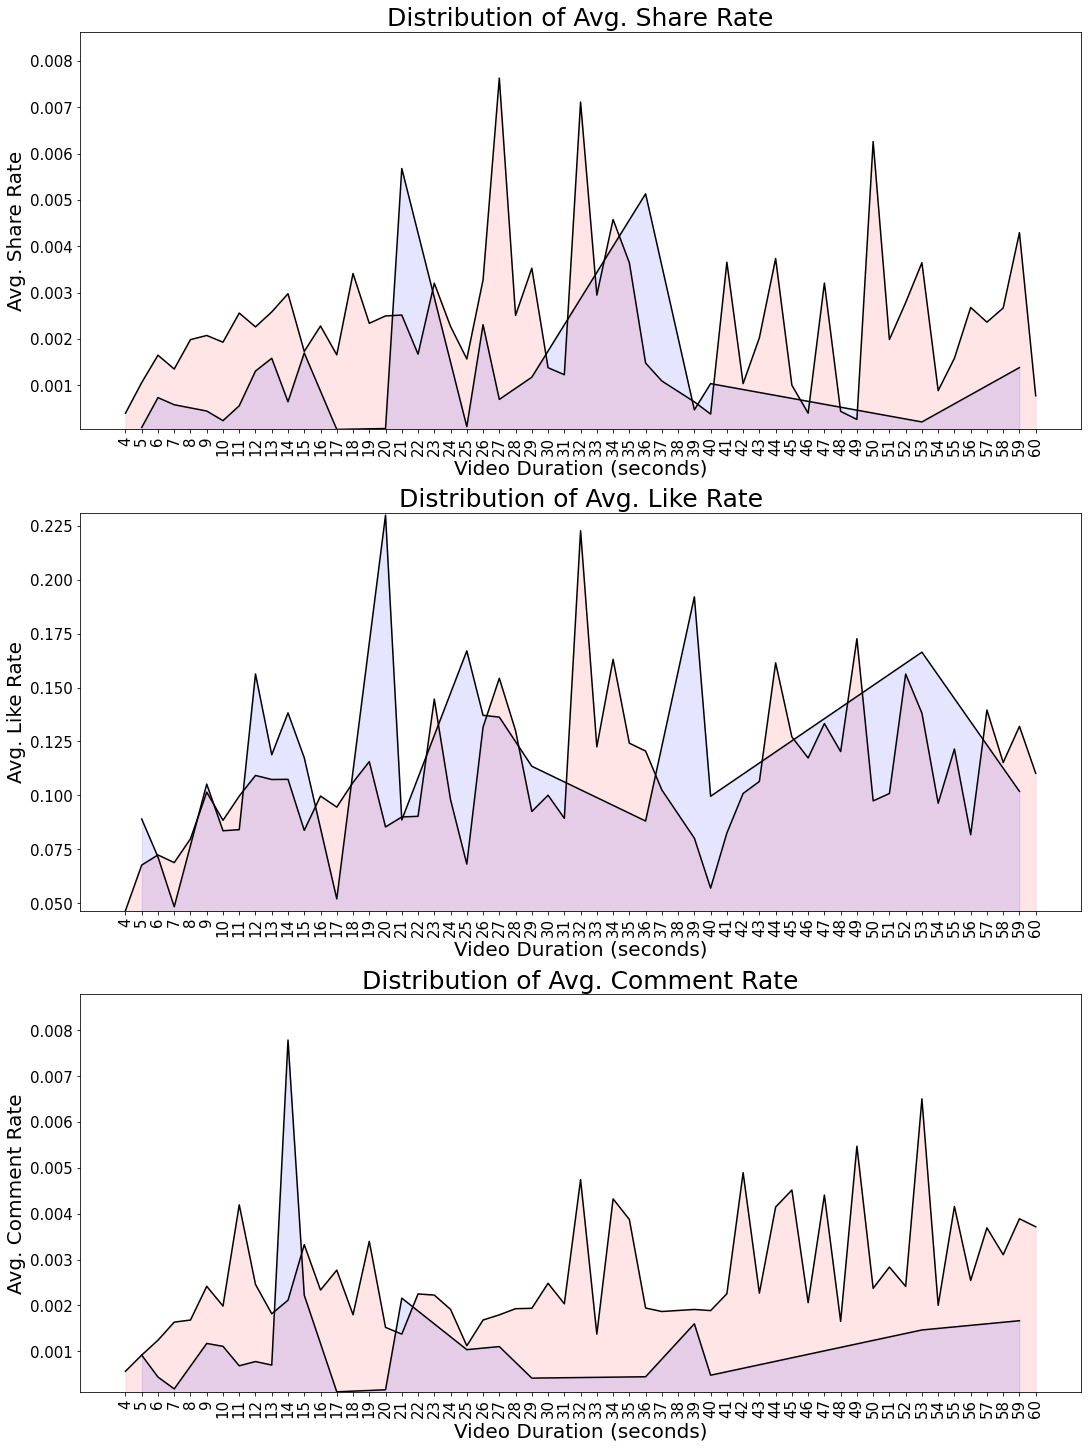

In [117]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
ax1 = fig.add_subplot(311)
plot_line(ax1, 'shareRate', 'Share Rate', 'k', 'r', 'b')

ax1 = fig.add_subplot(312)
plot_line(ax1, 'likeRate', 'Like Rate', 'k', 'r', 'b')

ax1 = fig.add_subplot(313)
plot_line(ax1, 'commentRate', 'Comment Rate', 'k', 'r', 'b')
plt.show()